In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
color=sb.color_palette()
from scipy import stats
from scipy.stats import norm,skew


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
df_train=pd.read_csv('ANKI_DSML/train.csv')
df_train.shape

(1460, 81)

In [5]:
df_train_corr=df_train.corr()
df_train_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [6]:
df_train.shape

(1460, 81)

In [7]:
df_train_corr[['SalePrice','OverallQual']].style.background_gradient(cmap='coolwarm',axis=None)

,SalePrice,OverallQual
Id,-0.021917,-0.028365
MSSubClass,-0.084284,0.032628
LotFrontage,0.351799,0.251646
LotArea,0.263843,0.105806
OverallQual,0.790982,1.000000
OverallCond,-0.077856,-0.091932
YearBuilt,0.522897,0.572323
YearRemodAdd,0.507101,0.550684
MasVnrArea,0.477493,0.411876
BsmtFinSF1,0.386420,0.239666


In [8]:
df_train.shape

(1460, 81)

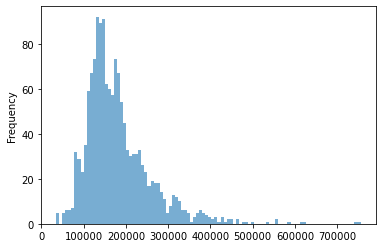

In [9]:
ax=df_train['SalePrice'].plot.hist(bins=100,alpha=0.6)

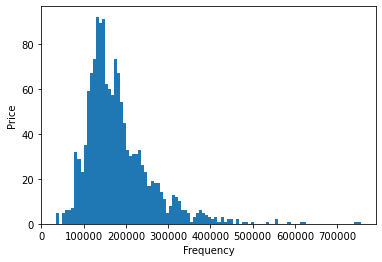

In [10]:
plt.hist(df_train['SalePrice'],bins=100)
# TITTLE & AXIS NAME
plt.xlabel('Frequency')
plt.ylabel('Price')
plt.show()

In [11]:
df_train.shape

(1460, 81)

In [12]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
df_train.drop(['SalePrice'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [14]:
df_train.shape

(1460, 81)

In [15]:
#CLEAN OUTLIERS
print("Length of data before dropping outliers:",len(df_train))
df_train=df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
print("Length of data after dropping outliers:",len(df_train))
df_train=df_train.drop(df_train[(df_train['GrLivArea']>5000) | (df_train['SalePrice']>500000)].index)
print("Length of data after dropping outliers:",len(df_train))


Length of data before dropping outliers: 1460
Length of data after dropping outliers: 1458
Length of data after dropping outliers: 1449


In [16]:
# QUANTITATIVE VARIABLES
quan_var=[q for q in df_train.columns if df_train.dtypes[q]!='object']
quan_var.remove('SalePrice')
quan_var.remove('Id')
print("Quantitative Variables:\n",quan_var)


Quantitative Variables:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [17]:
#QUALITATIVE VARIABLE
qual_var=[q for q in df_train.columns if df_train.dtypes[q]=='object']
print("Qualitative Variables:\n",quan_var)


Qualitative Variables:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [18]:
df_test=pd.read_csv('ANKI_DSML/test.csv')
df_test.shape

(1459, 80)

In [19]:
#COMBIN ALL DATA
ntrain=df_train.shape[0]
ntest=df_test.shape[0]
y_train=df_train.SalePrice.values
df_all_data=pd.concat((df_train,df_test)).reset_index(drop=True)
df_all_data.drop(['Id','SalePrice'],axis=1,inplace=True)
print("all_data size is : {}".format(df_all_data.shape))

all_data size is : (2908, 79)


In [20]:
#CALCULATING MISSING DATA
df_all_data_na=(df_all_data.isnull().sum()/len(df_all_data))*100
df_all_data_na=df_all_data_na.drop(df_all_data_na[df_all_data_na==0].index).sort_values(ascending=False)[:50]
missing_data=pd.DataFrame({'Missing Ratio':df_all_data_na})
print('Missing data Percentage:\n',missing_data.head(50))

Missing data Percentage:
               Missing Ratio
PoolQC            99.724897
MiscFeature       96.389271
Alley             93.191197
Fence             80.398900
FireplaceQu       48.830812
LotFrontage       16.712517
GarageFinish       5.467675
GarageYrBlt        5.467675
GarageQual         5.467675
GarageCond         5.467675
GarageType         5.398900
BsmtExposure       2.819807
BsmtCond           2.819807
BsmtQual           2.785420
BsmtFinType2       2.751032
BsmtFinType1       2.716644
MasVnrType         0.825309
MasVnrArea         0.790922
MSZoning           0.137552
BsmtFullBath       0.068776
BsmtHalfBath       0.068776
Utilities          0.068776
Functional         0.068776
Exterior2nd        0.034388
Exterior1st        0.034388
SaleType           0.034388
BsmtFinSF1         0.034388
BsmtFinSF2         0.034388
BsmtUnfSF          0.034388
Electrical         0.034388
KitchenQual        0.034388
GarageCars         0.034388
GarageArea         0.034388
TotalBsmtSF        0.0

In [21]:
df_all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2904,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2905,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2906,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [22]:
#PREDICTION

In [23]:
df_result=pd.DataFrame(columns=['Model','RMSE','MSE','Summery'])
print(df_result)

Empty DataFrame
Columns: [Model, RMSE, MSE, Summery]
Index: []


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
#FEATURE ENGINEERING

In [27]:
df_all_data['OverallQual_Garaage_GrLivArea']=df_all_data['OverallQual']* df_all_data['GarageArea']*df_all_data['GrLivArea']

In [28]:
#GET DUMMIES
X_all=pd.get_dummies(df_all_data)
X_all.fillna(0,inplace=True)
X=X_all[0:len(df_train)]
y=df_train['SalePrice']

In [29]:
#INITIATE TRAIN TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [30]:
rf=RandomForestRegressor(random_state=3)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
mse=mean_squared_error(y_test,y_pred_rf)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rf))
print('Root Mean Squared Error:{:.2f}'.format(rmse))
df_result=df_result.append(pd.DataFrame([['RandomForestRegressor',rmse,mse,'feature engineering']],columns=df_result.columns))


Root Mean Squared Error:26780.90


In [31]:
#CALCULATE FEATURE IMPORTANCE
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]
names=[X_train.columns[i]for i in indices]
print('Most Important:\n',names[:10])
print('Least Important:\n',names[(-10):])

Most Important:
 ['OverallQual_Garaage_GrLivArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'LotArea', 'YearRemodAdd', 'YearBuilt', 'GarageArea']
Least Important:
 ['Condition2_RRAn', 'Exterior1st_CBlock', 'RoofMatl_Roll', 'Exterior2nd_CBlock', 'Condition1_RRNe', 'ExterCond_Po', 'Utilities_AllPub', 'Utilities_NoSeWa', 'PoolQC_Fa', 'HeatingQC_Po']


In [32]:
#SCALLING
df_all_data_scaled=pd.DataFrame()
scaler=StandardScaler()
for col in quan_var:
    scaler.fit((np.array(df_all_data[col])).reshape(-1,1))
    scaled_list=scaler.transform((np.array(df_all_data[col])).reshape(-1,1))
    df_all_data_scaled[col]=[item for elem in scaled_list for item in elem]
    df_all_data_scaled.describe().T

In [33]:
#df_all_data_scaled['OverallQual_Garage_GrLivArea']=df_all_data_scaled['OverallQual']  \   df_all_data_scaled['GarageArea'] 
#\ df_all_data_scaled['GrLivArea'] 

     #GET DUMMIES
X_all=pd.get_dummies(df_all_data_scaled)
X_all.fillna(0,inplace=True)

X=X_all[0:len(df_train)]
y=df_train['SalePrice']
#INITIATE TRIAN TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)


In [34]:
rf_scaled=RandomForestRegressor(random_state=25)
rf_scaled.fit(X_train,y_train)
y_pred_rf=rf_scaled.predict(X_test)
mse=mean_squared_error(y_test,y_pred_rf)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rf))
print('Root Mean Squared Error:{:.2f}'.format (rmse))
df_result=df_result.append(pd.DataFrame([['RandomForestRegressor',rmse,mse,'Feature Engineering & scaled']],columns=df_result.columns))

Root Mean Squared Error:26437.46


In [35]:
X_test=X_all.iloc[len(df_train):len(X_all)]
y_pred_rf_scaled=rf_scaled.predict(X_test)

In [36]:
y_pred_rf_scaled

array([128147.99, 158616.4 , 176413.26, ..., 165039.59, 114321.5 ,
       240403.53])

In [37]:
sub=pd.DataFrame()
sub['Id']=df_test['Id']
sub['SalePrice']=y_pred_rf_scaled
sub.to_csv('submission.csv',index=False)